In [90]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [91]:
diabetes_data = load_diabetes()

In [92]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [93]:
print("\nParte da descrição do dataset Iris ({0}):\n{1}\n"
          .format("iris['DESCR']", diabetes_data['DESCR']))


Parte da descrição do dataset Iris (iris['DESCR']):
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar lev

In [94]:
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

df['target'] = diabetes_data.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [95]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

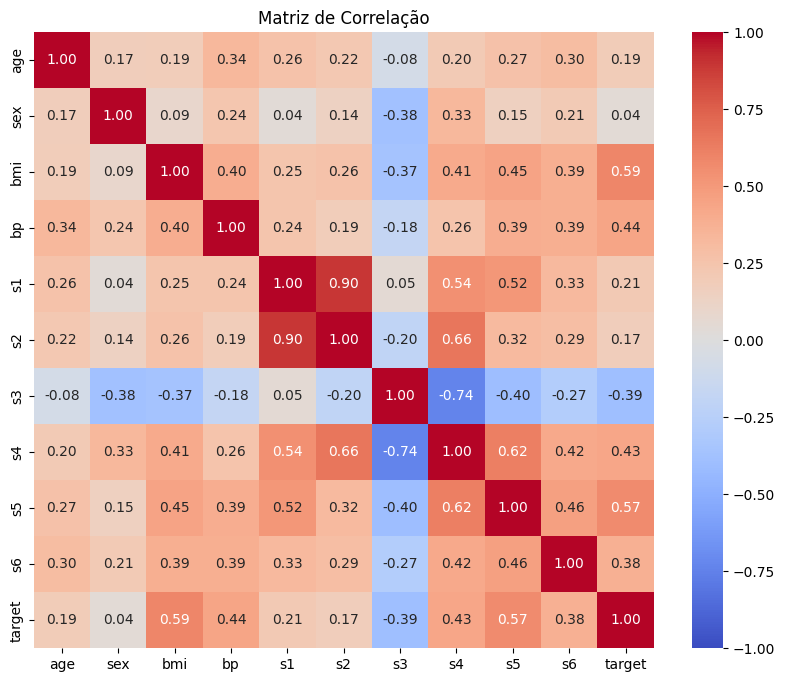

In [96]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Matriz de Correlação')
plt.show()

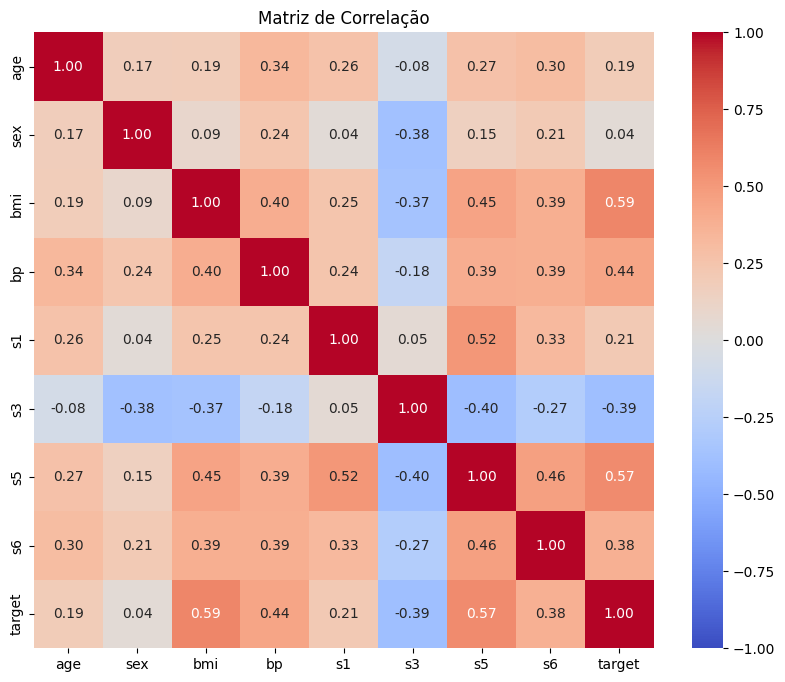

In [97]:
df = df.drop(columns=['s2', 's4'])

corr_matrix = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Matriz de Correlação')
plt.show()

In [98]:
missing_data = df.isnull().sum()
print(missing_data)

missing_data = missing_data[missing_data > 0]
print(missing_data)

age       0
sex       0
bmi       0
bp        0
s1        0
s3        0
s5        0
s6        0
target    0
dtype: int64
Series([], dtype: int64)


<Figure size 1200x1200 with 0 Axes>

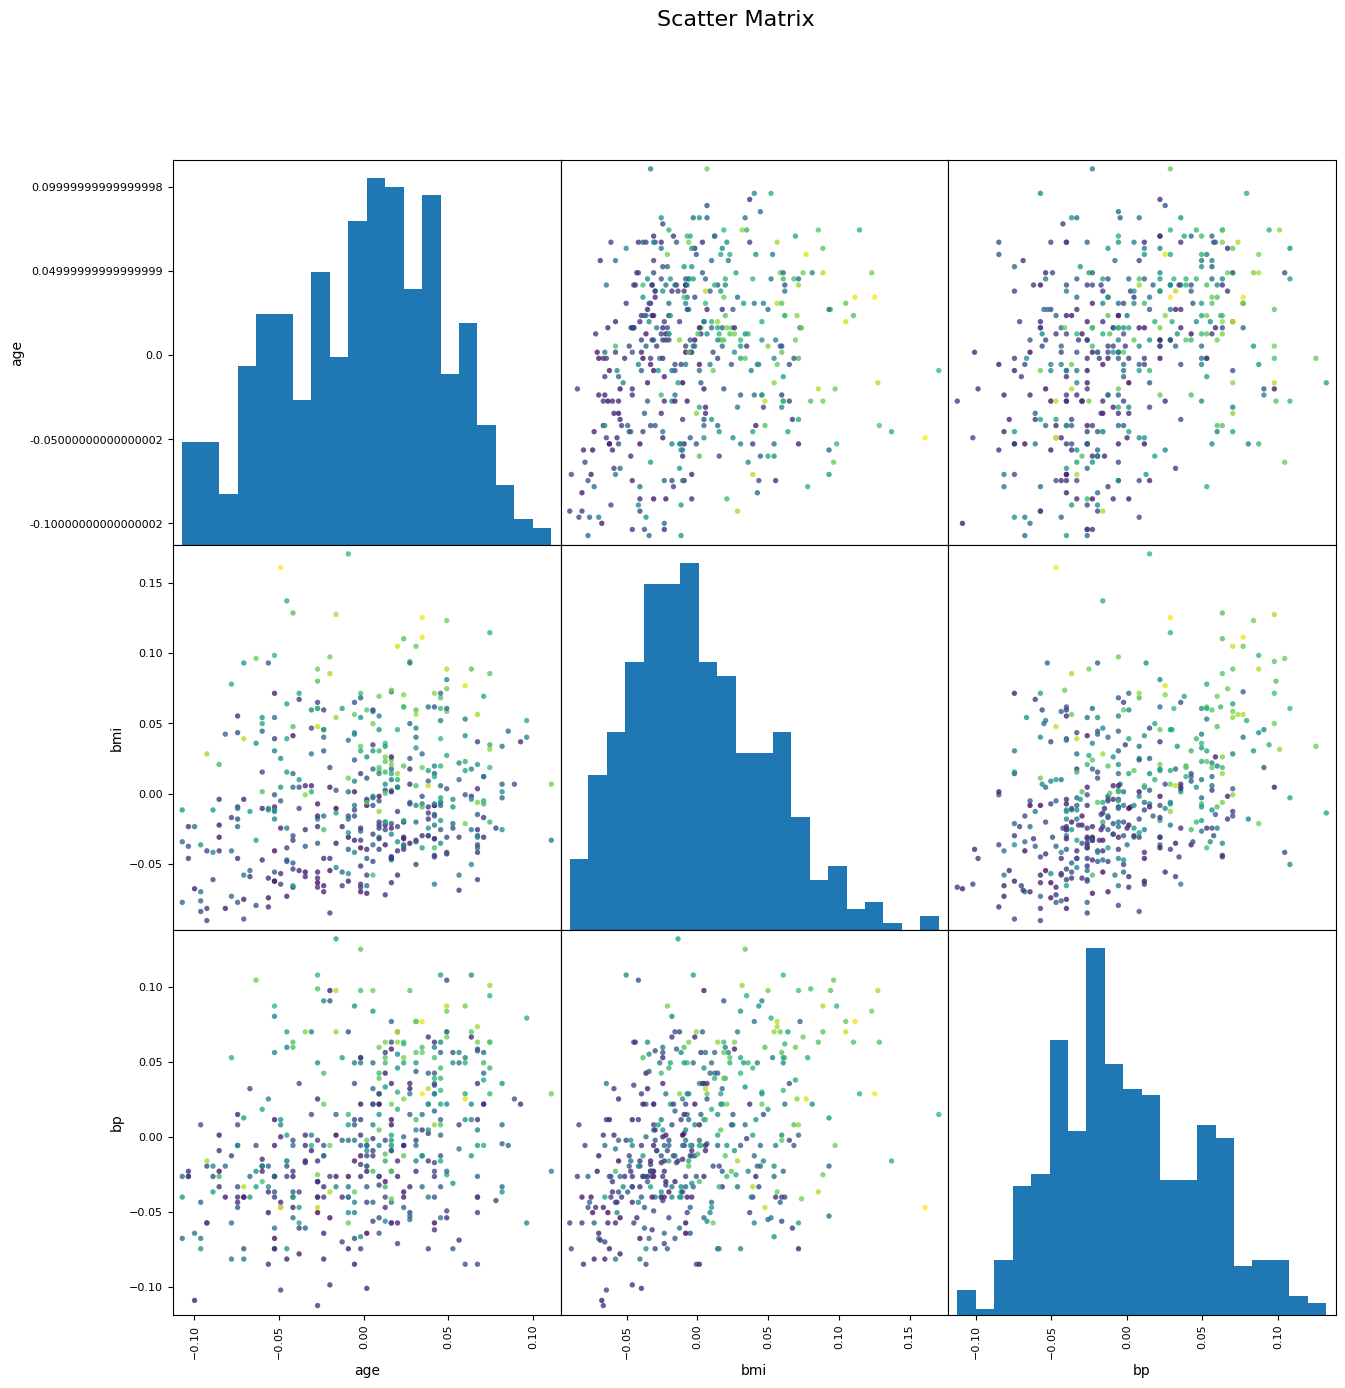

In [99]:
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(
    df[['age', 'bmi', 'bp']], alpha=0.8, figsize=(15, 15),
    c=diabetes_data['target'], diagonal='hist', hist_kwds={'bins': 20}, s=60)

plt.suptitle('Scatter Matrix', fontsize=16)
plt.show()

<Figure size 1200x1200 with 0 Axes>

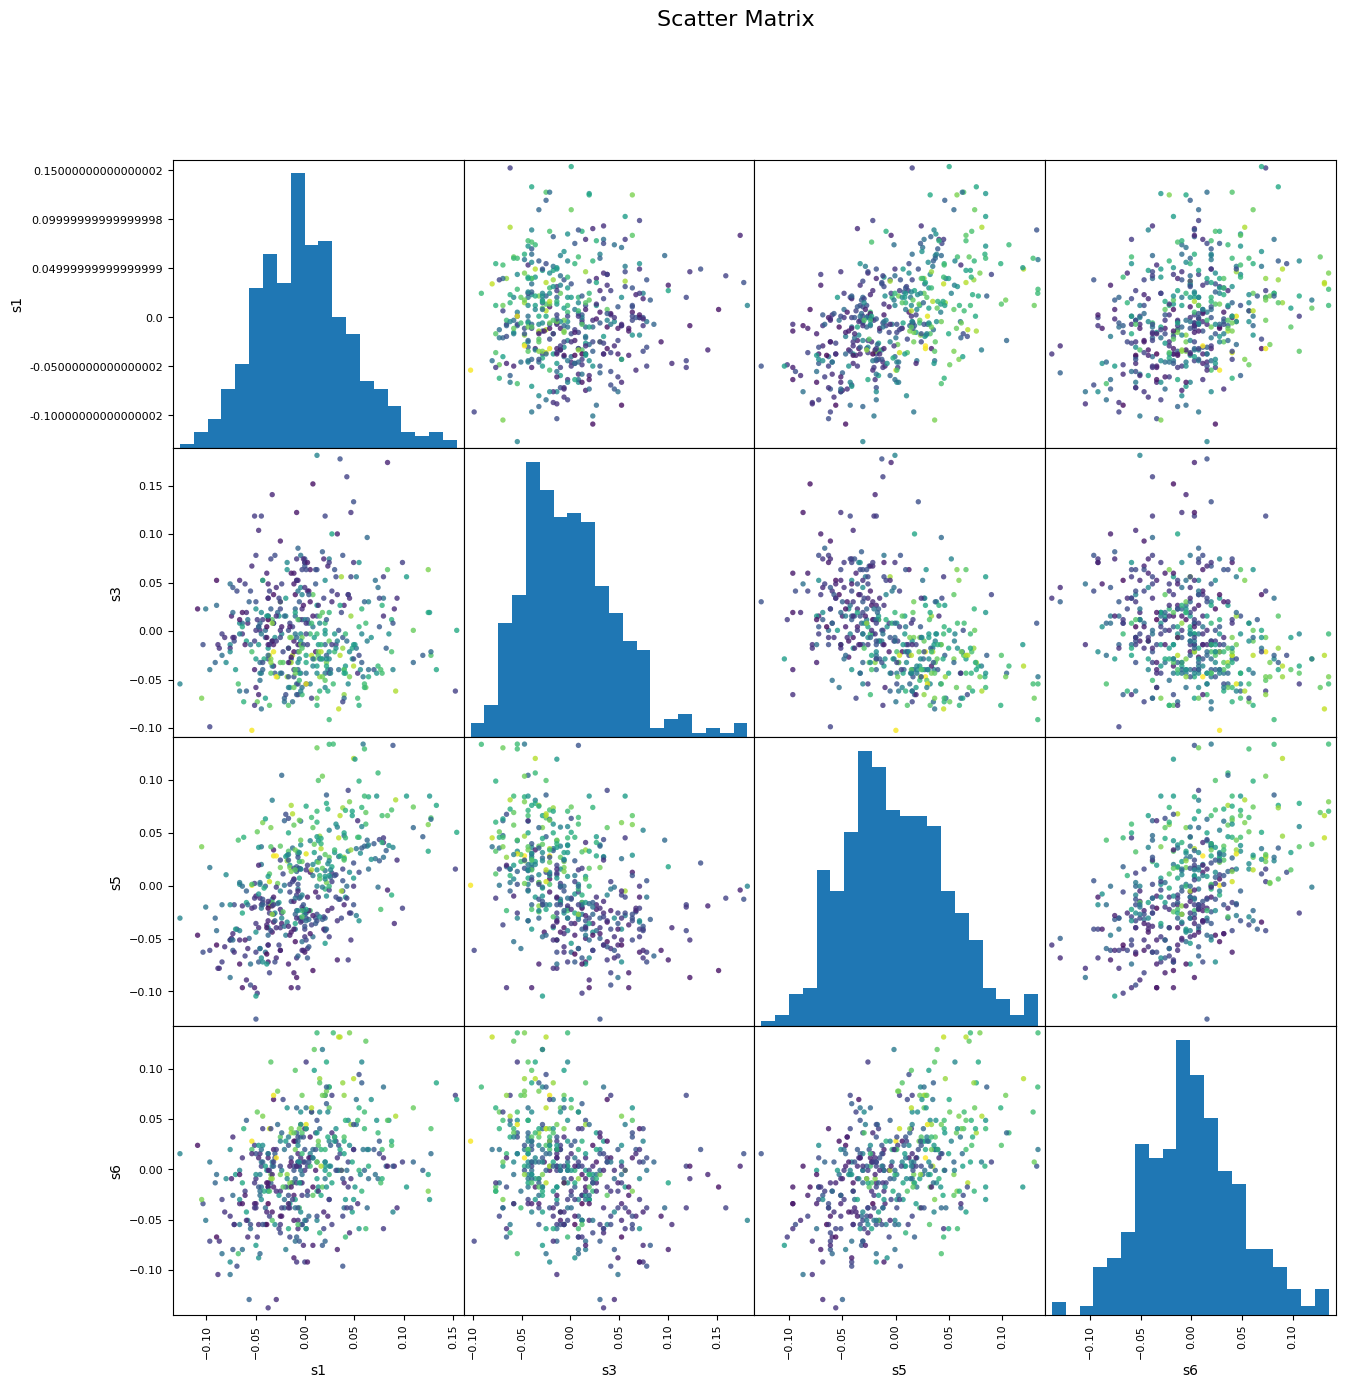

In [100]:
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(
    df[['s1', 's3', 's5', 's6']], alpha=0.8, figsize=(15, 15),
    c=diabetes_data['target'], diagonal='hist', hist_kwds={'bins': 20}, s=60)

plt.suptitle('Scatter Matrix', fontsize=16)
plt.show()

In [101]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("\nBase de treinamento ({0}):\n{1}\n".format(
    "X_train.shape", X_train.shape))

print("\nBase de teste ({0}):\n{1}\n".format("X_test.shape", X_test.shape))


Base de treinamento (X_train.shape):
(331, 8)


Base de teste (X_test.shape):
(111, 8)



In [102]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     50.04
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           4.03e-52
Time:                        22:40:26   Log-Likelihood:                -1782.6
No. Observations:                 331   AIC:                             3583.
Df Residuals:                     322   BIC:                             3617.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.0806      2.946     51.969      0.0

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
results = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3780.451154954955
Mean Absolute Error (MAE): 48.94252252252252
R-squared (R²): 0.23848988874963317


In [105]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Carrega o dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cria e treina o modelo Ridge
ridge = Ridge(alpha=1.0) # alpha controla a força da regularização
ridge.fit(X_train_scaled, y_train)

# Faz previsões e avalia o modelo
y_pred = ridge.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"R-squared com Regressão Ridge: {r2}")


R-squared com Regressão Ridge: 0.454146520706982
